<a href="https://colab.research.google.com/github/n28neeraj/BSE_2nd_Seesion_Tutorial/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Outlines**:

    1. What Singular-value decomposition is and what is involved.
    2. How to calculate an SVD and reconstruct a rectangular and square matrix from SVD elements.
    3. How to calculate the pseudoinverse and perform dimensionality reduction using the SVD.


**What is Singular Value Decomposition (SVD)?**

Matrix decomposition, also known as matrix factorization, involves describing a given matrix using its constituent elements.


**Rank of a Matrix**

The rank of a matrix is the maximum number of linearly independent row (or column) vectors in the matrix. A vector r is said to be linearly independent of vectors r1 and r2 if it cannot be expressed as a linear combination of r1 and r2.

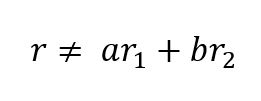

Consider the three matrices:

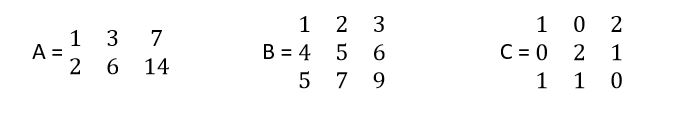

**SVD**

A = US $V^T$

If the dimensions of A are m x n:


>U is an m x m matrix of Left Singular Vectors

>S is an m x n rectangular diagonal matrix of Singular Values arranged in decreasing order

>V is an n x n matrix of Right Singular Vectors





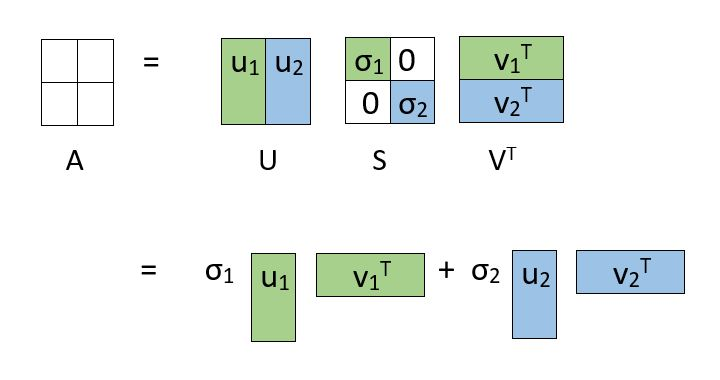


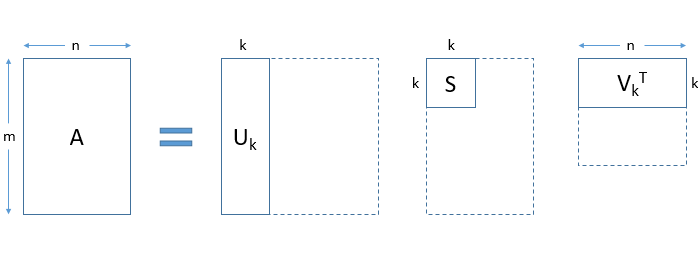




In [ ]:
# Singular-value decomposition
from scipy.linalg import svd
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print("A matrix: ",A)
# SVD
U, s, VT = svd(A)
print("U: ",U)
print("s: ",s)
print("VT: ",VT)

A matrix:  [[1 2]
 [3 4]
 [5 6]]
U:  [[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
s:  [9.52551809 0.51430058]
VT:  [[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


**Reconstruct Matrix from SVD**
After creating the square Sigma diagonal matrix, the sizes of the matrices are relative to the original m x n matrix that we are decomposing

U (m x m) . Sigma (n x n) . $V^T$ (n x n)

Whereas, we need:

U (m x m) . Sigma (m x n) . V^T (n x n)

For that, create a new Sigma matrix of all zero values that is m x n


In [ ]:
	
# Reconstruct SVD
from numpy import array
from numpy import diag
from numpy import dot
from numpy import zeros
from scipy.linalg import svd
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[1], :A.shape[1]] = diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(VT))
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [ ]:
from numpy import array
from numpy import diag
from numpy import dot
from scipy.linalg import svd
# define a matrix
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# create n x n Sigma matrix
Sigma = diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(VT))
print(B)

**SVD for Pseudoinverse**
It is the generalization of the matrix inverse for square matrices to rectangular matrices where the number of rows and columns are different.

Denoted as $A^+$

The pseudoinverse is calculated using the singular value decomposition of matrix A:

A = U . Sigma . $V^T$

The pseudoinverse will be 

$A^+$ = V . $D^+$ . $U^T$



$Sigma = \begin{Bmatrix}
s_{11}& 0 & 0\\ 
0& s_{22}  & 0\\ 
0& 0 & s_{33}
\end{Bmatrix}$



$D^+= \begin{Bmatrix}
 \frac{1}{s_{11}}& 0 & 0\\ 
 0& \frac{1}{s_{22}}  & 0\\ 
 0& 0 & \frac{1}{s_{33}}
\end{Bmatrix}$

NumPy provides the function pinv() for calculating the pseudoinverse of a rectangular matrix.

The example below defines a 4×2 matrix and calculates the pseudoinverse.

In [ ]:
from numpy import array
from numpy.linalg import pinv
# define matrix
A = array([
	[0.1, 0.2],
	[0.3, 0.4],
	[0.5, 0.6],
	[0.7, 0.8]])
print(A)
# calculate pseudoinverse
B = pinv(A)
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.00000000e+01 -5.00000000e+00  1.42385628e-14  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]


The specific implementation is:

$A^+$ = V . $D^+$ . $U^V$

In [ ]:
from numpy import array
from numpy.linalg import svd
from numpy import zeros
from numpy import diag
# define matrix
A = array([
	[0.1, 0.2],
	[0.3, 0.4],
	[0.5, 0.6],
	[0.7, 0.8]])
print(A)
# calculate svd
U, s, VT = svd(A)
# reciprocals of s
d = 1.0 / s
# create m x n D matrix
D = zeros(A.shape)
# populate D with n x n diagonal matrix
D[:A.shape[1], :A.shape[1]] = diag(d)
# calculate pseudoinverse
B = VT.T.dot(D.T).dot(U.T)
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.00000000e+01 -5.00000000e+00  1.42578328e-14  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]


**SVD for Dimensionality Reduction**

The example below demonstrates data reduction with the SVD.

In [ ]:
	
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
# define a matrix
A = array([
	[1,2,3,4,5,6,7,8,9,10],
	[11,12,13,14,15,16,17,18,19,20],
	[21,22,23,24,25,26,27,28,29,30]])
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[0], :A.shape[0]] = diag(s)
# select
n_elements = 2
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]
# reconstruct
B = U.dot(Sigma.dot(VT))
print(B)
# transform
T = U.dot(Sigma)
print(T)
T = A.dot(VT.T)
print(T)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]


In [ ]:
from numpy import array
from sklearn.decomposition import TruncatedSVD
# define array
A = array([
	[1,2,3,4,5,6,7,8,9,10],
	[11,12,13,14,15,16,17,18,19,20],
	[21,22,23,24,25,26,27,28,29,30]])
print(A)
# svd
svd = TruncatedSVD(n_components=2)
svd.fit(A)
result = svd.transform(A)
print(result)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[18.52157747  6.47697214]
 [49.81310011  1.91182038]
 [81.10462276 -2.65333138]]
